In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [179]:
client_id = "*******************"
client_secret = "*****************"
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [181]:
results = sp.search(q='Billie Eilish', limit=5)
for idx, track in enumerate(results['tracks']['items']):
    print(f"{idx + 1}. {track['name']} - {track['artists'][0]['name']}")

1. BIRDS OF A FEATHER - Billie Eilish
2. when the party's over - Billie Eilish
3. BILLIE EILISH. - Armani White
4. Guess featuring billie eilish - Charli xcx
5. TV - Billie Eilish


In [183]:
artist_names = ["The Weeknd", "Dua Lipa"]

In [185]:
tracks_data = []

In [187]:
for artist_name in artist_names:

    artist_results = sp.search(q=artist_name, type='artist', limit=1)
    artist_id = artist_results['artists']['items'][0]['id']
    
    top_tracks = sp.artist_top_tracks(artist_id)
    
    for track in top_tracks['tracks']:
        track_info = {
            'artist': artist_name,
            'track_name': track['name'],
            'popularity': track['popularity'],
            'release_date': track['album']['release_date'],
            'album': track['album']['name'],
            'explicit': track['explicit']
        }
        tracks_data.append(track_info)

In [189]:
tracks_df = pd.DataFrame(tracks_data)
tracks_df.head()

,artist,track_name,popularity,release_date,album,explicit
0,The Weeknd,Timeless (with Playboi Carti),92,2024-09-27,Timeless,True
1,The Weeknd,"One Of The Girls (with JENNIE, Lily Rose Depp)",90,2023-06-23,The Idol Episode 4 (Music from the HBO Origina...,False
2,The Weeknd,Blinding Lights,87,2020-03-20,After Hours,False
3,The Weeknd,Starboy,87,2016-11-25,Starboy,True
4,The Weeknd,Die For You,84,2016-11-24,Starboy,False


In [191]:
tracks_df.tail()

,artist,track_name,popularity,release_date,album,explicit
15,Dua Lipa,Dance The Night - From Barbie The Album,80,2023-05-25,Dance The Night (From Barbie The Album),False
16,Dua Lipa,New Rules,79,2017-06-02,Dua Lipa (Deluxe),False
17,Dua Lipa,Levitating (feat. DaBaby),78,2020-03-27,Future Nostalgia,False
18,Dua Lipa,IDGAF,77,2017-06-02,Dua Lipa (Deluxe),True
19,Dua Lipa,Scared to Be Lonely,78,2017-01-27,Scared to Be Lonely,False


In [193]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        20 non-null     object
 1   track_name    20 non-null     object
 2   popularity    20 non-null     int64 
 3   release_date  20 non-null     object
 4   album         20 non-null     object
 5   explicit      20 non-null     bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 952.0+ bytes


In [195]:
tracks_df.drop(columns=['explicit'], inplace=True)

In [197]:
tracks_df['popularity'].describe()

count    20.000000
mean     82.250000
std       4.458876
min      75.000000
25%      78.750000
50%      82.000000
75%      84.250000
max      92.000000
Name: popularity, dtype: float64

In [199]:
tracks_df.groupby('artist')['popularity'].mean()

artist
Dua Lipa      78.7
The Weeknd    85.8
Name: popularity, dtype: float64

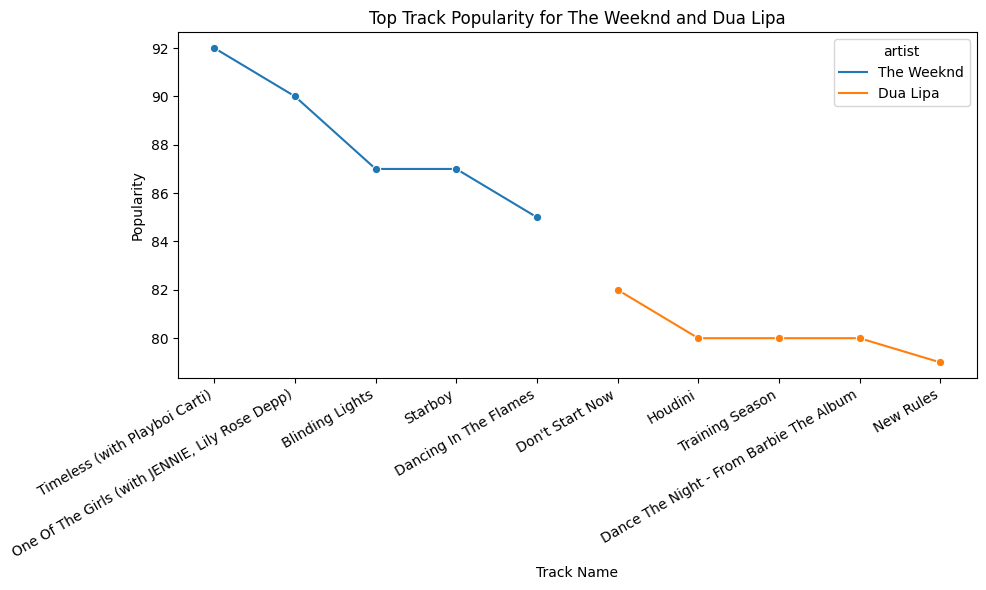

In [204]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_tracks_combined, x='track_name', y='popularity', hue='artist', marker='o')
plt.title('Top Track Popularity for The Weeknd and Dua Lipa')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()


In [206]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'])

In [208]:
tracks_df['release_year'] = tracks_df['release_date'].dt.year

In [210]:
yearly_tracks = tracks_df.groupby(['release_year', 'artist']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

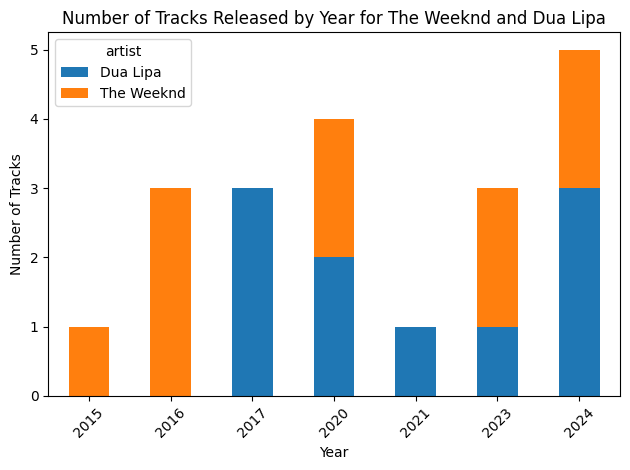

In [212]:
plt.figure(figsize=(12, 6))
yearly_tracks.plot(kind='bar', stacked=True)
plt.title('Number of Tracks Released by Year for The Weeknd and Dua Lipa')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

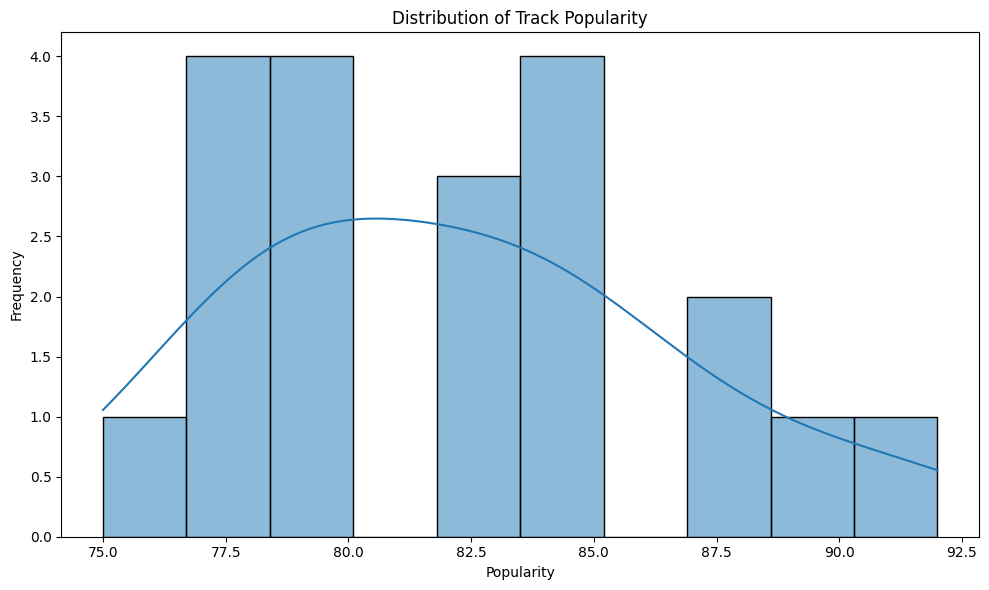

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(tracks_df['popularity'], bins=10, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [216]:
artist_stats = tracks_df.groupby('artist').agg({'track_name': 'count', 'popularity': 'mean'}).reset_index()

In [218]:
artist_stats.columns = ['artist', 'track_count', 'average_popularity']

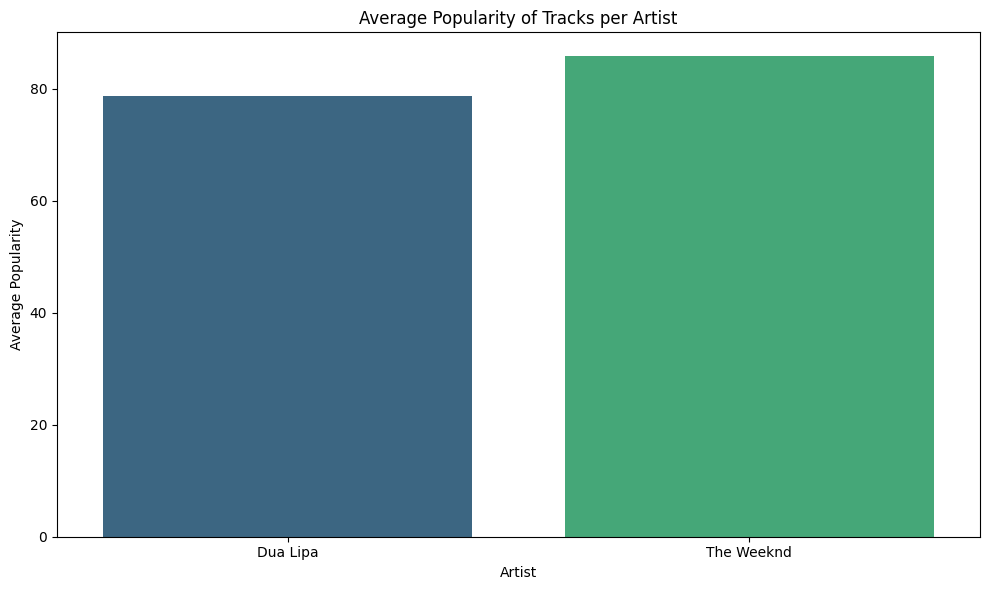

In [220]:
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_stats, x='artist', y='average_popularity', palette='viridis')
plt.title('Average Popularity of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

In [ ]:
album_counts_artist1 = tracks_df[tracks_df['artist'] == 'The Weeknd'].groupby('album').size().reset_index(name='track_count')

In [ ]:
album_counts_artist2 = tracks_df[tracks_df['artist'] == 'Dua Lipa'].groupby('album').size().reset_index(name='track_count')

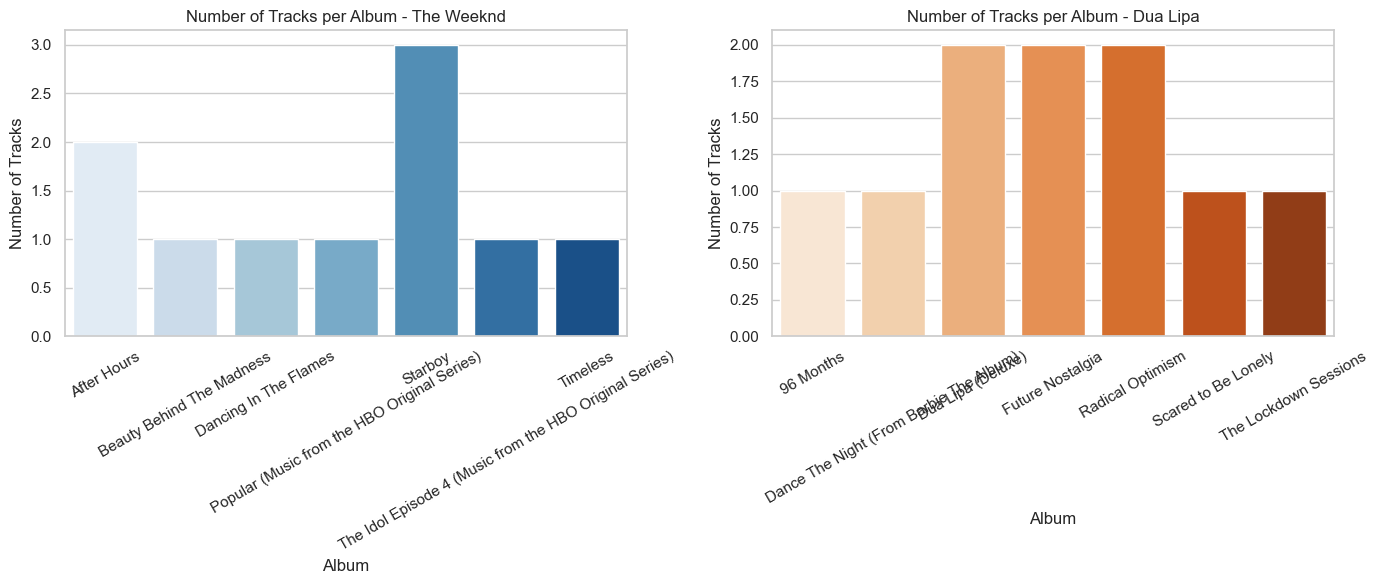

In [268]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=album_counts_artist1, x='album', y='track_count', ax=axes[0], palette='Blues')
axes[0].set_title('Number of Tracks per Album - The Weeknd')
axes[0].set_xlabel('Album')
axes[0].set_ylabel('Number of Tracks')
axes[0].set_xticklabels(album_counts_artist1['album'], rotation=30)

sns.barplot(data=album_counts_artist2, x='album', y='track_count', ax=axes[1], palette='Oranges')
axes[1].set_title('Number of Tracks per Album - Dua Lipa')
axes[1].set_xlabel('Album')
axes[1].set_ylabel('Number of Tracks')
axes[1].set_xticklabels(album_counts_artist2['album'], rotation=30)

plt.tight_layout()
plt.show()


In [ ]:
popularity_album_artist1 = tracks_df[tracks_df['artist'] == 'The Weeknd'].groupby('album')['popularity'].mean().reset_index(name='average_popularity')

In [ ]:
popularity_album_artist2 = tracks_df[tracks_df['artist'] == 'Dua Lipa'].groupby('album')['popularity'].mean().reset_index(name='average_popularity')

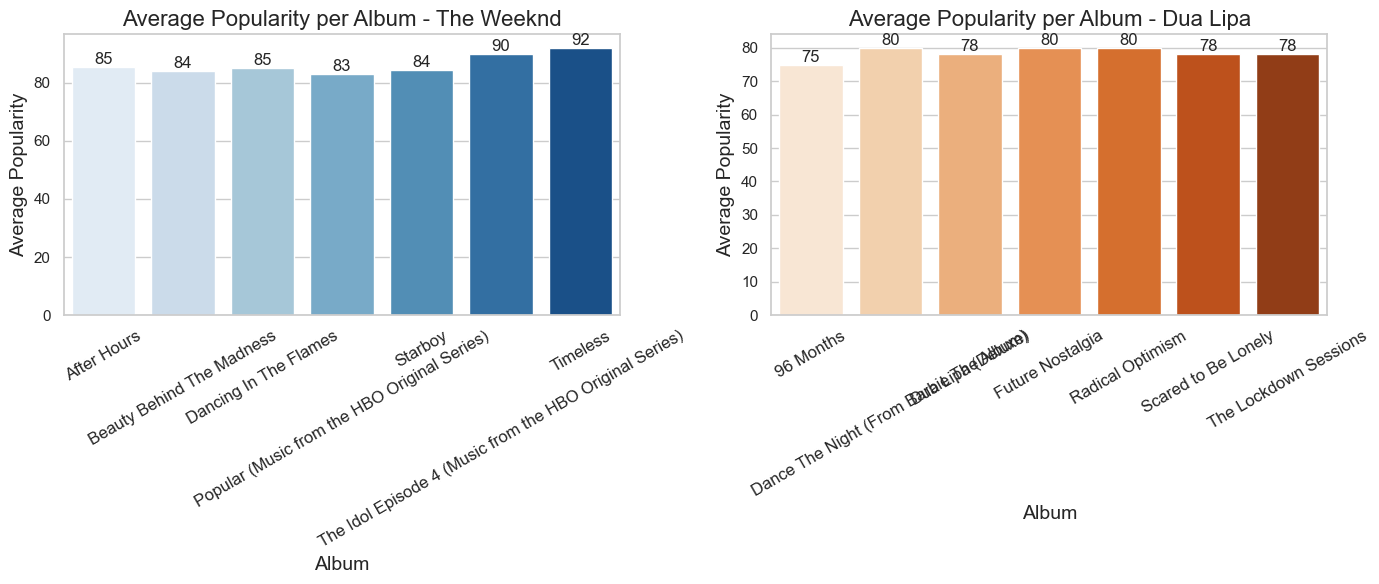

In [277]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=popularity_album_artist1, x='album', y='average_popularity', ax=axes[0], palette='Blues')
axes[0].set_title('Average Popularity per Album - The Weeknd', fontsize=16)
axes[0].set_xlabel('Album', fontsize=14)
axes[0].set_ylabel('Average Popularity', fontsize=14)
axes[0].set_xticklabels(popularity_album_artist1['album'], rotation=30, fontsize=12)

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12)


sns.barplot(data=popularity_album_artist2, x='album', y='average_popularity', ax=axes[1], palette='Oranges')
axes[1].set_title('Average Popularity per Album - Dua Lipa', fontsize=16)
axes[1].set_xlabel('Album', fontsize=14)
axes[1].set_ylabel('Average Popularity', fontsize=14)
axes[1].set_xticklabels(popularity_album_artist2['album'], rotation=30, fontsize=12)


for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
